# Random Forest 

### Import Libraries

In [2]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

### Import Dataset

In [3]:
df = pd.read_csv("../EDA/cleaned_df_2017-05-26.csv",  parse_dates=['timestamp'], index_col=False, low_memory=False)
y_train = df.loc[df['price_doc_log'].notnull(), 'price_doc_log']
X_train = df.loc[df['price_doc_log'].notnull(), df.columns != 'price_doc_log']
X_test = df.loc[df['price_doc_log'].isnull(), df.columns != 'price_doc_log'].drop('price_doc', axis=1)

In [4]:
id_test = X_test['id']
type(id_test)]]]

pandas.core.series.Series

In [12]:
X_train[X_train['full_sq'] == 0]

,0_13_all,0_13_female,0_13_male,0_17_all,0_17_female,0_17_male,0_6_all,0_6_female,0_6_male,16_29_all,16_29_female,16_29_male,7_14_all,7_14_female,7_14_male,ID_big_road1,ID_big_road2,ID_bus_terminal,ID_metro,ID_railroad_station_avto,ID_railroad_station_walk,ID_railroad_terminal,additional_education_km,additional_education_raion,area_m,basketball_km,big_church_count_1000,big_church_count_1500,big_church_count_2000,big_church_count_3000,big_church_count_500,big_church_count_5000,big_church_km,big_market_km,big_road1_km,big_road2_km,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,build_count_before_1920,build_count_block,build_count_brick,build_count_foam,build_count_frame,build_count_mix,build_count_monolith,build_count_panel,build_count_slag,build_count_wood,build_year,bulvar_ring_km,bus_terminal_avto_km,cafe_avg_price_1000,cafe_avg_price_1500,cafe_avg_price_2000,cafe_avg_price_3000,cafe_avg_price_500,cafe_avg_price_5000,cafe_count_1000,cafe_count_1000_na_price,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_500,cafe_count_1000_price_high,cafe_count_1500,cafe_count_1500_na_price,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_500,cafe_count_1500_price_high,cafe_count_2000,cafe_count_2000_na_price,cafe_count_2000_price_1000,cafe_count_2000_price_1500,cafe_count_2000_price_2500,cafe_count_2000_price_4000,cafe_count_2000_price_500,cafe_count_2000_price_high,cafe_count_3000,cafe_count_3000_na_price,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_500,cafe_count_3000_price_high,cafe_count_500,cafe_count_5000,cafe_count_5000_na_price,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_500,cafe_count_5000_price_high,cafe_count_500_na_price,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_500,cafe_count_500_price_high,cafe_sum_1000_max_price_avg,cafe_sum_1000_min_price_avg,cafe_sum_1500_max_price_avg,cafe_sum_1500_min_price_avg,cafe_sum_2000_max_price_avg,cafe_sum_2000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_sum_3000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_sum_5000_min_price_avg,cafe_sum_500_max_price_avg,cafe_sum_500_min_price_avg,catering_km,cemetery_km,children_preschool,children_school,church_count_1000,church_count_1500,church_count_2000,church_count_3000,church_count_500,church_count_5000,church_synagogue_km,culture_objects_top_25_raion,detention_facility_km,ekder_all,ekder_female,ekder_male,exhibition_km,female_f,fitness_km,floor,full_all,full_sq,green_part_1000,green_part_1500,green_part_2000,green_part_3000,green_part_500,green_part_5000,green_zone_km,green_zone_part,healthcare_centers_raion,hospice_morgue_km,hospital_beds_raion,ice_rink_km,id,incineration_km,indust_part,industrial_km,kindergarten_km,kitch_sq,kremlin_km,leisure_count_1000,leisure_count_1500,leisure_count_2000,leisure_count_3000,leisure_count_500,leisure_count_5000,life_sq,male_f,market_count_1000,market_count_1500,market_count_2000,market_count_3000,market_count_500,market_count_5000,market_shop_km,material,max_floor,metro_km_avto,metro_km_walk,metro_min_avto,metro_min_walk,mkad_km,mosque_count_1000,mosque_count_1500,mosque_count_2000,mosque_count_3000,mosque_count_500,mosque_count_5000,mosque_km,museum_km,nuclear_reactor_km,num_room,office_count_1000,office_count_1500,office_count_2000,office_count_3000,office_count_500,office_count_5000,office_km,office_raion,office_sqm_1000,office_sqm_1500,office_sqm_2000,office_sqm_3000,office_sqm_500,office_sqm_5000,oil_chemistry_km,park_km,power_transmission_line_km,preschool_education_centers_raion,preschool_km,preschool_quota,price_doc,prom_part_1000,prom_part_1500,prom_part

### Encode Non-numerical Data 

In [6]:
from sklearn import model_selection, preprocessing
from sklearn.preprocessing import LabelEncoder

def encode_object_features(df):
    '''
    Will encode each non-numerical column.
    '''
    for f in df.columns:
        if df[f].dtype=='object':
            print(f)
            lbl = preprocessing.LabelEncoder()
            lbl.fit(list(df[f].values.astype('str')) + list(df[f].values.astype('str')))
            df[f] = lbl.transform(list(df[f].values.astype('str')))    
    return df

In [7]:
X_train = encode_object_features(X_train)
X_test = encode_object_features(X_test)

one_month_lag
three_month_lag
six_month_lag
twelve_month_lag
timestamp_1
timestamp_3
timestamp_6
timestamp_12
big_market_raion
big_road1_1line
culture_objects_top_25
detention_facility_raion
ecology
incineration_raion
nuclear_reactor_raion
oil_chemistry_raion
product_type
radiation_raion
railroad_1line
railroad_terminal_raion
sub_area
thermal_power_plant_raion
water_1line
child_on_acc_pre_school
modern_education_share
old_education_build_share
one_month_lag
three_month_lag
six_month_lag
twelve_month_lag
timestamp_1
timestamp_3
timestamp_6
timestamp_12
big_market_raion
big_road1_1line
culture_objects_top_25
detention_facility_raion
ecology
incineration_raion
nuclear_reactor_raion
oil_chemistry_raion
product_type
radiation_raion
railroad_1line
railroad_terminal_raion
sub_area
thermal_power_plant_raion
water_1line
child_on_acc_pre_school
modern_education_share
old_education_build_share


In [100]:
feature_list = ['full_sq',
                'life_sq',
                'floor',
                'max_floor',
                'material',
                'build_year',
                'num_room',
                'kitch_sq',
                'state',
                'product_type',
                'sub_area',
                'indust_part',
                'school_education_centers_raion',
                'sport_objects_raion',
                'culture_objects_top_25_raion',
                'oil_chemistry_raion',
                'metro_min_avto',
                'green_zone_km',
                'industrial_km',
                'kremlin_km',
                'radiation_km',
                'ts_km',
                'fitness_km',
                'stadium_km',
                'additional_education_km',
                'cafe_count_1500_price_500',
                'cafe_count_1500_price_high',
                'cafe_count_2000_price_2500',
                'trc_sqm_5000',
                'cafe_count_5000',
                'cafe_count_5000_price_high',
                'delta_oil_1',
                'delta_oil_3',
                'delta_oil_6',
                'delta_oil_12',
                'delta_usdrub_1',
                'delta_usdrub_3',
                'delta_usdrub_6',
                'delta_usdrub_12',
                'delta_labor_force_1',
                'delta_labor_force_3',
                'delta_labor_force_6',
                'delta_labor_force_12']

In [68]:
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

In [24]:
X_test.head()
#np.sum(X_test.isnull())
# fillna(0)

,0_13_all,0_13_female,0_13_male,0_17_all,0_17_female,0_17_male,0_6_all,0_6_female,0_6_male,16_29_all,16_29_female,16_29_male,7_14_all,7_14_female,7_14_male,ID_big_road1,ID_big_road2,ID_bus_terminal,ID_metro,ID_railroad_station_avto,ID_railroad_station_walk,ID_railroad_terminal,additional_education_km,additional_education_raion,area_m,basketball_km,big_church_count_1000,big_church_count_1500,big_church_count_2000,big_church_count_3000,big_church_count_500,big_church_count_5000,big_church_km,big_market_km,big_road1_km,big_road2_km,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,build_count_before_1920,build_count_block,build_count_brick,build_count_foam,build_count_frame,build_count_mix,build_count_monolith,build_count_panel,build_count_slag,build_count_wood,build_year,bulvar_ring_km,bus_terminal_avto_km,cafe_avg_price_1000,cafe_avg_price_1500,cafe_avg_price_2000,cafe_avg_price_3000,cafe_avg_price_500,cafe_avg_price_5000,cafe_count_1000,cafe_count_1000_na_price,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_500,cafe_count_1000_price_high,cafe_count_1500,cafe_count_1500_na_price,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_500,cafe_count_1500_price_high,cafe_count_2000,cafe_count_2000_na_price,cafe_count_2000_price_1000,cafe_count_2000_price_1500,cafe_count_2000_price_2500,cafe_count_2000_price_4000,cafe_count_2000_price_500,cafe_count_2000_price_high,cafe_count_3000,cafe_count_3000_na_price,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_500,cafe_count_3000_price_high,cafe_count_500,cafe_count_5000,cafe_count_5000_na_price,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_500,cafe_count_5000_price_high,cafe_count_500_na_price,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_500,cafe_count_500_price_high,cafe_sum_1000_max_price_avg,cafe_sum_1000_min_price_avg,cafe_sum_1500_max_price_avg,cafe_sum_1500_min_price_avg,cafe_sum_2000_max_price_avg,cafe_sum_2000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_sum_3000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_sum_5000_min_price_avg,cafe_sum_500_max_price_avg,cafe_sum_500_min_price_avg,catering_km,cemetery_km,children_preschool,children_school,church_count_1000,church_count_1500,church_count_2000,church_count_3000,church_count_500,church_count_5000,church_synagogue_km,culture_objects_top_25_raion,detention_facility_km,ekder_all,ekder_female,ekder_male,exhibition_km,female_f,fitness_km,floor,full_all,full_sq,green_part_1000,green_part_1500,green_part_2000,green_part_3000,green_part_500,green_part_5000,green_zone_km,green_zone_part,healthcare_centers_raion,hospice_morgue_km,hospital_beds_raion,ice_rink_km,id,incineration_km,indust_part,industrial_km,kindergarten_km,kitch_sq,kremlin_km,leisure_count_1000,leisure_count_1500,leisure_count_2000,leisure_count_3000,leisure_count_500,leisure_count_5000,life_sq,male_f,market_count_1000,market_count_1500,market_count_2000,market_count_3000,market_count_500,market_count_5000,market_shop_km,material,max_floor,metro_km_avto,metro_km_walk,metro_min_avto,metro_min_walk,mkad_km,mosque_count_1000,mosque_count_1500,mosque_count_2000,mosque_count_3000,mosque_count_500,mosque_count_5000,mosque_km,museum_km,nuclear_reactor_km,num_room,office_count_1000,office_count_1500,office_count_2000,office_count_3000,office_count_500,office_count_5000,office_km,office_raion,office_sqm_1000,office_sqm_1500,office_sqm_2000,office_sqm_3000,office_sqm_500,office_sqm_5000,oil_chemistry_km,park_km,power_transmission_line_km,preschool_education_centers_raion,preschool_km,preschool_quota,prom_part_1000,prom_part_1500,prom_part_2000,prom

## Selecting Features

In [12]:
# 50 sample leaves

from sklearn.ensemble import RandomForestRegressor

X = X_train.loc[:,feature_list]

y = y_train

x_test = X_test.loc[:,feature_list]

#sample_leaf_options = [50]

#for leaf_size in sample_leaf_options :
rfr50 = RandomForestRegressor(n_estimators=1000, oob_score=True, n_jobs = -1,
                               verbose = 1, random_state = 42, min_samples_leaf = 50)
# Train the model using the training sets and check score
rfr50.fit(X, y.values)
print "Leaf Size: %d" % (leaf_size)
print rfr50.score(X, y)


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   23.6s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  2.3min finished


Leaf Size: 50


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.5s


0.505769477952


[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.0s finished


In [70]:
# 100 sample leaves
from sklearn.ensemble import RandomForestRegressor

X = X_train.loc[:,feature_list]

y = y_train

x_test = X_test.loc[:,feature_list]

#sample_leaf_options = [50]

#for leaf_size in sample_leaf_options :
rfr100 = RandomForestRegressor(n_estimators=1000, oob_score=True, n_jobs = -1,
                               verbose = 1, random_state = 42, min_samples_leaf = 100)
# Train the model using the training sets and check score
rfr100.fit(X, y.values)
print "Leaf Size: %d" % (leaf_size)
print rfr100.score(X, y)

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   50.5s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  2.0min finished


Leaf Size: 50


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.3s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    1.6s finished


0.457492024342


In [26]:
predicted = rfr50.predict(x_test)

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    1.2s finished


In [71]:
predicted100 = rfr100.predict(x_test)

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    1.2s finished


In [34]:
import numpy as np
np.expm1(predicted)

array([ 5253005.08167508,  7756261.66853258,  5051011.79108764, ...,
        4239494.44670195,  5073827.5651485 ,  7691840.50317609])

In [35]:
y_pred = np.expm1(predicted)
df_sub = pd.DataFrame({'id': id_test, 'price_doc': y_pred})

In [37]:
df_sub.to_csv("submission_rfr50.csv", index=False)

In [38]:
len(df_sub)

7662

In [39]:
sample = pd.read_csv('/Users/andrewrubino/Downloads/sample_submission.csv')

In [42]:
sample['price_doc'] = y_pred

In [46]:
sample.to_csv("~/submission_rfr50.csv", index=False)

In [49]:
importances = rfr50.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfr50.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 0 (0.478776)
2. feature 29 (0.110585)
3. feature 8 (0.083513)
4. feature 16 (0.053432)
5. feature 6 (0.029836)
6. feature 30 (0.022704)
7. feature 27 (0.022572)
8. feature 23 (0.019665)
9. feature 5 (0.016190)
10. feature 19 (0.014936)
11. feature 28 (0.013489)
12. feature 21 (0.010593)
13. feature 18 (0.008970)
14. feature 10 (0.008823)
15. feature 24 (0.008511)
16. feature 13 (0.008336)
17. feature 11 (0.007611)
18. feature 20 (0.007054)
19. feature 22 (0.006915)
20. feature 17 (0.006607)
21. feature 25 (0.006434)
22. feature 34 (0.006172)
23. feature 38 (0.006000)
24. feature 3 (0.004726)
25. feature 37 (0.003600)
26. feature 4 (0.003588)
27. feature 9 (0.003525)
28. feature 2 (0.003503)
29. feature 12 (0.003289)
30. feature 35 (0.003008)
31. feature 7 (0.002822)
32. feature 33 (0.002673)
33. feature 1 (0.002418)
34. feature 36 (0.002378)
35. feature 31 (0.001778)
36. feature 26 (0.001412)
37. feature 32 (0.001273)
38. feature 41 (0.000896)
39. feature 42

In [50]:
X.iloc[:,[29]]

,cafe_count_5000
0,152
1,177
2,122
3,61
4,2283
5,567
6,635
7,143
8,292
9,143


In [85]:
import numpy as np
np.expm1(predicted100)
y_pred100 = np.expm1(predicted100)
df_sub = pd.DataFrame({'id': id_test, 'price_doc': y_pred100}).reset_index(drop=True)
#df_sub = pd.read_csv('~/submission100.csv')
#sample['price_doc'] = y_pred
df_sub.to_csv("~/submission100.csv", index=False)

In [82]:
pd.DataFrame({'id': id_test, 'price_doc': y_pred100}).reset_index(drop=True)

,id,price_doc
0,30474,5.183311e+06
1,30475,7.820473e+06
2,30476,5.182502e+06
3,30477,5.814715e+06
4,30478,5.122823e+06
5,30479,7.422217e+06
6,30480,4.291577e+06
7,30481,4.257132e+06
8,30482,4.516462e+06
9,30483,4.617439e+06


# Model # 3

In [122]:
df = pd.read_csv("../EDA/cleaned_df_2017-05-26.csv",  parse_dates=['timestamp'], index_col=False, low_memory=False)
y_train = df.loc[df['price_doc'].notnull(), 'price_doc']
X_train = df.loc[df['price_doc_log'].notnull(), df.columns != 'price_doc_log']
X_test = df.loc[df['price_doc_log'].isnull(), df.columns != 'price_doc_log'].drop('price_doc', axis=1)

In [123]:
id_test = X_test['id']

In [124]:
feature_list3 = ['rel_kitch_sq',
                'rel_floor',
                'max_floor',
                'material',
                'build_year',
                'state',
                'product_type',
                'sub_area',
                'indust_part',
                'school_education_centers_raion',
                'sport_objects_raion',
                'culture_objects_top_25_raion',
                'oil_chemistry_raion',
                'metro_min_avto',
                'green_zone_km',
                'industrial_km',
                'kremlin_km',
                'radiation_km',
                'ts_km',
                'fitness_km',
                'stadium_km',
                'additional_education_km',
                'trc_sqm_5000',
                'cafe_count_5000',
                'delta_oil_1',
                'delta_oil_3',
                'delta_oil_6',
                'delta_oil_12',
                'delta_usdrub_1',
                'delta_usdrub_3',
                'delta_usdrub_6',
                'delta_usdrub_12',
                'work_share']

In [125]:
# Encode the vars
X_train = encode_object_features(X_train)
X_test = encode_object_features(X_test)

one_month_lag
three_month_lag
six_month_lag
twelve_month_lag
timestamp_1
timestamp_3
timestamp_6
timestamp_12
big_market_raion
big_road1_1line
culture_objects_top_25
detention_facility_raion
ecology
incineration_raion
nuclear_reactor_raion
oil_chemistry_raion
product_type
radiation_raion
railroad_1line
railroad_terminal_raion
sub_area
thermal_power_plant_raion
water_1line
child_on_acc_pre_school
modern_education_share
old_education_build_share
one_month_lag
three_month_lag
six_month_lag
twelve_month_lag
timestamp_1
timestamp_3
timestamp_6
timestamp_12
big_market_raion
big_road1_1line
culture_objects_top_25
detention_facility_raion
ecology
incineration_raion
nuclear_reactor_raion
oil_chemistry_raion
product_type
radiation_raion
railroad_1line
railroad_terminal_raion
sub_area
thermal_power_plant_raion
water_1line
child_on_acc_pre_school
modern_education_share
old_education_build_share


In [134]:
# Fill na's just in case
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)
X_train = X_train.replace(np.inf, 0)
X_test = X_test.replace(np.inf, 0)

In [118]:
y_train.values

array([  5850000.,   6000000.,   5700000., ...,   6970959.,  13500000.,
         5600000.])

In [136]:
# 50 sample leaves

from sklearn.ensemble import RandomForestRegressor

X = X_train.loc[:,feature_list3].astype(np.float32)

y = y_train

x_test = X_test.loc[:,feature_list3]

#sample_leaf_options = [50]

#for leaf_size in sample_leaf_options :
rfr_model3_50leaves = RandomForestRegressor(n_estimators=1000, oob_score=True, n_jobs = -1,
                               verbose = 1, random_state = 40, min_samples_leaf = 50)
# Train the model using the training sets and check score
rfr_model3_50leaves.fit(X, y.values)
print "Leaf Size: %d" % (leaf_size)
print rfr_model3_50leaves.score(X, y)


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  2.1min finished


Leaf Size: 50


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.4s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.1s finished


0.532423078099


In [137]:
predicted_model3 = rfr_model3_50leaves.predict(x_test)

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    1.4s finished


In [144]:
predicted_model3
df_sub_model3 = pd.DataFrame({'id': id_test, 'price_doc': predicted_model3}).reset_index(drop = True)
#df_sub = pd.read_csv('~/submission100.csv')
#sample['price_doc'] = y_pred
df_sub_model3.to_csv("/Users/andrewrubino/Desktop/submission_model3.csv", index=False)

# Model 4

Adding back some of these other features like full_sq, but leaving out labor_force deltas. Seems to be missingness issues with some of the housing ratios.

In [147]:
df = pd.read_csv("../EDA/cleaned_df_2017-05-26.csv",  parse_dates=['timestamp'], index_col=False, low_memory=False)
y_train = df.loc[df['price_doc'].notnull(), 'price_doc']
X_train = df.loc[df['price_doc_log'].notnull(), df.columns != 'price_doc_log']
X_test = df.loc[df['price_doc_log'].isnull(), df.columns != 'price_doc_log'].drop('price_doc', axis=1)
id_test = X_test['id']

In [148]:
y_train

0         5850000.0
1         6000000.0
2         5700000.0
3        13100000.0
4        16331452.0
5         9100000.0
6         5500000.0
7         2000000.0
8         5300000.0
9         2000000.0
10        4650000.0
11        4800000.0
12        5100000.0
13        5200000.0
14        5000000.0
15        1850000.0
16        6300000.0
17        5900000.0
18        7900000.0
19        5200000.0
20        8200000.0
21        5200000.0
22        6250000.0
23        5750000.0
24        6000000.0
25        1050000.0
26        5000000.0
27        4700000.0
28        8254400.0
29        5900000.0
            ...    
30441    25039300.0
30442     4350000.0
30443     7567425.0
30444    11438948.0
30445    10139368.0
30446     6125400.0
30447     6373324.0
30448     6888144.0
30449     9227657.0
30450    12610000.0
30451     2394300.0
30452     6800000.0
30453     4066740.0
30454     6300000.0
30455     9014972.0
30456     1000000.0
30457     7800000.0
30458     6370777.0
30459     5778893.0


In [149]:
# Encode the vars
X_train = encode_object_features(X_train)
X_test = encode_object_features(X_test)

one_month_lag
three_month_lag
six_month_lag
twelve_month_lag
timestamp_1
timestamp_3
timestamp_6
timestamp_12
big_market_raion
big_road1_1line
culture_objects_top_25
detention_facility_raion
ecology
incineration_raion
nuclear_reactor_raion
oil_chemistry_raion
product_type
radiation_raion
railroad_1line
railroad_terminal_raion
sub_area
thermal_power_plant_raion
water_1line
child_on_acc_pre_school
modern_education_share
old_education_build_share
one_month_lag
three_month_lag
six_month_lag
twelve_month_lag
timestamp_1
timestamp_3
timestamp_6
timestamp_12
big_market_raion
big_road1_1line
culture_objects_top_25
detention_facility_raion
ecology
incineration_raion
nuclear_reactor_raion
oil_chemistry_raion
product_type
radiation_raion
railroad_1line
railroad_terminal_raion
sub_area
thermal_power_plant_raion
water_1line
child_on_acc_pre_school
modern_education_share
old_education_build_share


In [150]:
# Fill na's just in case
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)
X_train = X_train.replace(np.inf, 0)
X_test = X_test.replace(np.inf, 0)

In [154]:
feature_list4 = ['full_sq^2',
                'material',
                'build_year',
                'state',
                'product_type',
                'sub_area',
                'indust_part',
                'school_education_centers_raion',
                'sport_objects_raion',
                'culture_objects_top_25_raion',
                'oil_chemistry_raion',
                'metro_min_avto',
                'green_zone_km',
                'industrial_km',
                'kremlin_km',
                'radiation_km',
                'ts_km',
                'fitness_km',
                'stadium_km',
                'additional_education_km',
                'trc_sqm_5000',
                'cafe_count_5000',
                'delta_oil_1',
                'delta_oil_3',
                'delta_oil_6',
                'delta_oil_12',
                'delta_usdrub_1',
                'delta_usdrub_3',
                'delta_usdrub_6',
                'delta_usdrub_12',
                'work_share']

In [155]:
# 50 sample leaves

from sklearn.ensemble import RandomForestRegressor

X = X_train.loc[:,feature_list4].astype(np.float32)

y = y_train

x_test = X_test.loc[:,feature_list4]

#sample_leaf_options = [50]

#for leaf_size in sample_leaf_options :
rfr_model4_50leaves = RandomForestRegressor(n_estimators=1000, oob_score=True, n_jobs = -1,
                               verbose = 1, random_state = 40, min_samples_leaf = 50)
# Train the model using the training sets and check score
rfr_model4_50leaves.fit(X, y.values)
print "Leaf Size: %d" % (leaf_size)
print rfr_model4_50leaves.score(X, y)


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   29.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  2.4min finished


Leaf Size: 50


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.3s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.3s


0.691392532752


[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.8s finished


In [156]:
predicted_model4 = rfr_model4_50leaves.predict(x_test)
print predicted_model4
df_sub_model4 = pd.DataFrame({'id': id_test, 'price_doc': predicted_model4}).reset_index(drop = True)
#df_sub = pd.read_csv('~/submission100.csv')
#sample['price_doc'] = y_pred
df_sub_model4.to_csv("/Users/andrewrubino/Desktop/submission_model4.csv", index=False)

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.1s


[ 5595601.71132619  7803080.53639193  5713250.2405229  ...,
  4653214.49247638  5436755.29006308  8525922.86566321]


[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    1.3s finished


In [ ]:
# Model4: 0.33314 (better!)

In [158]:
# Do the same model, but with 100 trees instead of 50
# 50 sample leaves

from sklearn.ensemble import RandomForestRegressor

X = X_train.loc[:,feature_list4].astype(np.float32)

y = y_train

x_test = X_test.loc[:,feature_list4]

#sample_leaf_options = [50]

#for leaf_size in sample_leaf_options :
rfr_model4_100leaves = RandomForestRegressor(n_estimators=1000, oob_score=True, n_jobs = -1,
                               verbose = 1, random_state = 45, min_samples_leaf = 100)
# Train the model using the training sets and check score
rfr_model4_100leaves.fit(X, y.values)
print "Leaf Size: %d" % (leaf_size)
print rfr_model4_100leaves.score(X, y)


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   24.9s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   55.2s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  2.0min finished


Leaf Size: 50


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.1s


0.639715562057


[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    1.4s finished


In [160]:
predicted_model4_2 = rfr_model4_100leaves.predict(x_test)
print predicted_model4_2
df_sub_model4_2 = pd.DataFrame({'id': id_test, 'price_doc': predicted_model4_2}).reset_index(drop = True)
#df_sub = pd.read_csv('~/submission100.csv')
#sample['price_doc'] = y_pred
df_sub_model4_2.to_csv("/Users/andrewrubino/Desktop/submission_model4_2.csv", index=False)

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    1.2s finished


[ 5480386.54704818  7822401.9360403   5798179.34193695 ...,
  4768913.29799229  5403036.37629732  8409945.09639758]


In [ ]:
# Model 4_2: 0.33674 (slightly worse)

# Model 5
Now includes the delta of the labor forces. Will include full_sqrt this time as well. Also gonna include more cafe counts just to see what happens.
    

In [161]:
df = pd.read_csv("../EDA/cleaned_df_2017-05-26.csv",  parse_dates=['timestamp'], index_col=False, low_memory=False)
y_train = df.loc[df['price_doc'].notnull(), 'price_doc']
X_train = df.loc[df['price_doc_log'].notnull(), df.columns != 'price_doc_log']
X_test = df.loc[df['price_doc_log'].isnull(), df.columns != 'price_doc_log'].drop('price_doc', axis=1)
id_test = X_test['id']

In [162]:
# Encode the vars
X_train = encode_object_features(X_train)
X_test = encode_object_features(X_test)

one_month_lag
three_month_lag
six_month_lag
twelve_month_lag
timestamp_1
timestamp_3
timestamp_6
timestamp_12
big_market_raion
big_road1_1line
culture_objects_top_25
detention_facility_raion
ecology
incineration_raion
nuclear_reactor_raion
oil_chemistry_raion
product_type
radiation_raion
railroad_1line
railroad_terminal_raion
sub_area
thermal_power_plant_raion
water_1line
child_on_acc_pre_school
modern_education_share
old_education_build_share
one_month_lag
three_month_lag
six_month_lag
twelve_month_lag
timestamp_1
timestamp_3
timestamp_6
timestamp_12
big_market_raion
big_road1_1line
culture_objects_top_25
detention_facility_raion
ecology
incineration_raion
nuclear_reactor_raion
oil_chemistry_raion
product_type
radiation_raion
railroad_1line
railroad_terminal_raion
sub_area
thermal_power_plant_raion
water_1line
child_on_acc_pre_school
modern_education_share
old_education_build_share


In [163]:
# Fill na's just in case
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)
X_train = X_train.replace(np.inf, 0)
X_test = X_test.replace(np.inf, 0)

In [165]:
feature_list5 = ['full_sqrt',
                'material',
                'build_year',
                'state',
                'product_type',
                'sub_area',
                'indust_part',
                'school_education_centers_raion',
                'sport_objects_raion',
                'culture_objects_top_25_raion',
                'oil_chemistry_raion',
                'metro_min_avto',
                'green_zone_km',
                'industrial_km',
                'kremlin_km',
                'radiation_km',
                'ts_km',
                'fitness_km',
                'stadium_km',
                'additional_education_km',
                'trc_sqm_5000',
                'cafe_count_5000',
                'cafe_count_1500_price_500',
                'cafe_count_1500_price_high',
                'cafe_count_2000_price_2500',
                'cafe_count_5000_price_high',                 
                'delta_oil_1',
                'delta_oil_3',
                'delta_oil_6',
                'delta_oil_12',
                'delta_usdrub_1',
                'delta_usdrub_3',
                'delta_usdrub_6',
                'delta_usdrub_12',
                'delta_labor_force_1',
                'delta_labor_force_3',
                'delta_labor_force_6',
                'delta_labor_force_12',                 
                'work_share']

In [166]:
# 50 sample leaves

from sklearn.ensemble import RandomForestRegressor

X = X_train.loc[:,feature_list5].astype(np.float32)

y = y_train

x_test = X_test.loc[:,feature_list5]

#sample_leaf_options = [50]

#for leaf_size in sample_leaf_options :
rfr_model5_50leaves = RandomForestRegressor(n_estimators=1000, oob_score=True, n_jobs = -1,
                               verbose = 1, random_state = 23, min_samples_leaf = 50)
# Train the model using the training sets and check score
rfr_model5_50leaves.fit(X, y.values)
print "Leaf Size: %d" % (leaf_size)
print rfr_model5_50leaves.score(X, y)


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   57.7s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  2.2min finished


Leaf Size: 50


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.5s


0.694790299028


[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    1.9s finished


In [167]:
predicted_model5 = rfr_model5_50leaves.predict(x_test)
print predicted_model4
df_sub_model5 = pd.DataFrame({'id': id_test, 'price_doc': predicted_model5}).reset_index(drop = True)
#df_sub = pd.read_csv('~/submission100.csv')
#sample['price_doc'] = y_pred
df_sub_model5.to_csv("/Users/andrewrubino/Desktop/submission_model5.csv", index=False)

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.0s


[ 5595601.71132619  7803080.53639193  5713250.2405229  ...,
  4653214.49247638  5436755.29006308  8525922.86566321]


[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    1.2s finished


In [ ]:
# Model5: 0.33205 (better!)

# Model 6
Now includes month, day, year, and micex_cbi delta values. Also changed back to full_sq
    

In [203]:
df = pd.read_csv("../EDA/cleaned_df_2017-05-26.csv",  parse_dates=['timestamp'], index_col=False, low_memory=False)
y_train = df.loc[df['price_doc'].notnull(), 'price_doc']
X_train = df.loc[df['price_doc_log'].notnull(), df.columns != 'price_doc_log']
X_test = df.loc[df['price_doc_log'].isnull(), df.columns != 'price_doc_log'].drop('price_doc', axis=1)
id_test = X_test['id']
print X_train.shape

(30471, 453)


In [204]:
# Slight feature engineering for delta micex values in training set
X_train['delta_micex_cbi_tr_1'] = (X_train['micex_cbi_tr_1'] - X_train['micex_cbi_tr']) / X_train['micex_cbi_tr_1']
X_train['delta_micex_cbi_tr_3'] = (X_train['micex_cbi_tr_3'] - X_train['micex_cbi_tr']) / X_train['micex_cbi_tr_3']
X_train['delta_micex_cbi_tr_6'] = (X_train['micex_cbi_tr_6'] - X_train['micex_cbi_tr']) / X_train['micex_cbi_tr_6']
X_train['delta_micex_cbi_tr_12'] = (X_train['micex_cbi_tr_12'] - X_train['micex_cbi_tr']) / X_train['micex_cbi_tr_12']

In [205]:
# Slight feature engineering for delta micex values in testing set
X_test['delta_micex_cbi_tr_1'] = (X_test['micex_cbi_tr_1'] - X_test['micex_cbi_tr']) / X_test['micex_cbi_tr_1']
X_test['delta_micex_cbi_tr_3'] = (X_test['micex_cbi_tr_3'] - X_test['micex_cbi_tr']) / X_test['micex_cbi_tr_3']
X_test['delta_micex_cbi_tr_6'] = (X_test['micex_cbi_tr_6'] - X_test['micex_cbi_tr']) / X_test['micex_cbi_tr_6']
X_test['delta_micex_cbi_tr_12'] = (X_test['micex_cbi_tr_12'] - X_test['micex_cbi_tr']) / X_test['micex_cbi_tr_12']

In [206]:
# Encode the vars
X_train = encode_object_features(X_train)
X_test = encode_object_features(X_test)

one_month_lag
three_month_lag
six_month_lag
twelve_month_lag
timestamp_1
timestamp_3
timestamp_6
timestamp_12
big_market_raion
big_road1_1line
culture_objects_top_25
detention_facility_raion
ecology
incineration_raion
nuclear_reactor_raion
oil_chemistry_raion
product_type
radiation_raion
railroad_1line
railroad_terminal_raion
sub_area
thermal_power_plant_raion
water_1line
child_on_acc_pre_school
modern_education_share
old_education_build_share
one_month_lag
three_month_lag
six_month_lag
twelve_month_lag
timestamp_1
timestamp_3
timestamp_6
timestamp_12
big_market_raion
big_road1_1line
culture_objects_top_25
detention_facility_raion
ecology
incineration_raion
nuclear_reactor_raion
oil_chemistry_raion
product_type
radiation_raion
railroad_1line
railroad_terminal_raion
sub_area
thermal_power_plant_raion
water_1line
child_on_acc_pre_school
modern_education_share
old_education_build_share


In [208]:
# Fill na's just in case
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)
X_train = X_train.replace(np.inf, 0)
X_test = X_test.replace(np.inf, 0)

In [161]:
feature_list6 = ['full_sq',
                'material',
                'build_year',
                'state',
                'product_type',
                'sub_area',
                'indust_part',
                'school_education_centers_raion',
                'sport_objects_raion',
                'culture_objects_top_25_raion',
                'oil_chemistry_raion',
                'metro_min_avto',
                'green_zone_km',
                'industrial_km',
                'kremlin_km',
                'radiation_km',
                'ts_km',
                'fitness_km',
                'stadium_km',
                'additional_education_km',
                'trc_sqm_5000',
                'cafe_count_2000_price_2500',                 
                'delta_oil_1',
                'delta_oil_3',
                'delta_oil_6',
                'delta_oil_12',
                'delta_usdrub_1',
                'delta_usdrub_3',
                'delta_usdrub_6',
                'delta_usdrub_12',
                'delta_labor_force_1',
                'delta_labor_force_3',
                'delta_labor_force_6',
                'delta_labor_force_12',                 
                'work_share',
                'month','day','year',
                'culture_objects_top_25_raion',
                'delta_micex_cbi_tr_1',
                'delta_micex_cbi_tr_3',
                'delta_micex_cbi_tr_6',
                'delta_micex_cbi_tr_12']

print len(feature_list6)

43


In [175]:
# 50 sample leaves

from sklearn.ensemble import RandomForestRegressor

X = X_train.loc[:,feature_list6].astype(np.float32)

y = y_train

x_test = X_test.loc[:,feature_list6]

#sample_leaf_options = [50]

#for leaf_size in sample_leaf_options :
rfr_model6_50leaves = RandomForestRegressor(n_estimators=1000, oob_score=True, n_jobs = -1,
                               verbose = 1, random_state = 23, min_samples_leaf = 50)
# Train the model using the training sets and check score
rfr_model6_50leaves.fit(X, y.values)
print "Leaf Size: %d" % (leaf_size)
print rfr_model6_50leaves.score(X, y)





[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  2.4min finished


Leaf Size: 50


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.6s


0.695383734864


[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.1s finished


In [176]:
predicted_model6 = rfr_model6_50leaves.predict(x_test)
print predicted_model6
df_sub_model6 = pd.DataFrame({'id': id_test, 'price_doc': predicted_model6}).reset_index(drop = True)
#df_sub = pd.read_csv('~/submission100.csv')
#sample['price_doc'] = y_pred
df_sub_model6.to_csv("/Users/andrewrubino/Desktop/submission_model6.csv", index=False)

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.1s


[ 5557591.14629081  7848550.23803603  5949582.64645891 ...,
  4268213.12478446  5480125.35699043  8595693.56883461]


[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    1.3s finished


In [ ]:
# Model6(with 50 leaves): 0.33120 (better!)

In [163]:
# try 20 min_sample_leaf

X = X_train.loc[:,feature_list6].astype(np.float32)

y = y_train

x_test = X_test.loc[:,feature_list6]

#sample_leaf_options = [50]

#for leaf_size in sample_leaf_options :
rfr_model6_20leaves = RandomForestRegressor(n_estimators=1000, oob_score=True, n_jobs = -1,
                               verbose = 1, random_state = 123, min_samples_leaf = 20)
# Train the model using the training sets and check score
rfr_model6_20leaves.fit(X, y.values)
# print "Leaf Size: %d" % (leaf_size) 
print rfr_model6_20leaves.score(X, y)


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   44.9s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  3.9min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.8s finished


0.767035373036


In [176]:
# Check estimators
rfr_model6_20leaves.fit(X, y.values)
print rfr_model6_20leaves.estimators_

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   43.4s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  3.4min finished


[DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=20, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False,
           random_state=843828734, splitter='best'), DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=20, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False,
           random_state=914636141, splitter='best'), DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=20, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False,
           random_state=1228959102, splitter='best'), DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
           max_leaf_nodes=None, mi

In [181]:
# Check feature importantces
importances = rfr_model6_20leaves.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfr_model6_20leaves.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    
 

Feature ranking:
1. feature 0 (0.535526)
2. feature 21 (0.097937)
3. feature 3 (0.068425)
4. feature 14 (0.065789)
5. feature 18 (0.048779)
6. feature 20 (0.042609)
7. feature 11 (0.012072)
8. feature 8 (0.010536)
9. feature 19 (0.008686)
10. feature 6 (0.008131)
11. feature 13 (0.008084)
12. feature 2 (0.007792)
13. feature 12 (0.007660)
14. feature 34 (0.007137)
15. feature 15 (0.006926)
16. feature 16 (0.006521)
17. feature 5 (0.005912)
18. feature 7 (0.005776)
19. feature 17 (0.005357)
20. feature 29 (0.004170)
21. feature 1 (0.004030)
22. feature 37 (0.003940)
23. feature 41 (0.003057)
24. feature 28 (0.002559)
25. feature 25 (0.002198)
26. feature 42 (0.002167)
27. feature 9 (0.001846)
28. feature 40 (0.001814)
29. feature 4 (0.001798)
30. feature 26 (0.001789)
31. feature 38 (0.001769)
32. feature 39 (0.001628)
33. feature 27 (0.001476)
34. feature 24 (0.001475)
35. feature 36 (0.001329)
36. feature 22 (0.001026)
37. feature 35 (0.000786)
38. feature 23 (0.000748)
39. feature 32

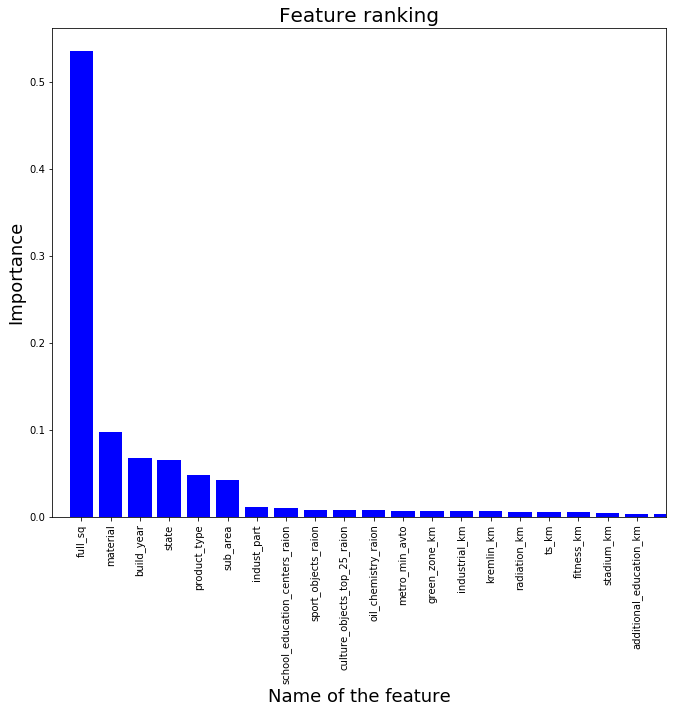

In [197]:
# Plot feature importance
import matplotlib.pyplot as plt
%matplotlib inline
f, ax = plt.subplots(figsize=(11, 9))
plt.title("Feature ranking", fontsize = 20)
plt.bar(range(X.shape[1]), importances[indices],
    color="b", 
    align="center")
plt.xticks(range(20), X.columns, rotation = 90)
plt.xlim([-1, 20])
plt.ylabel("Importance", fontsize = 18)
plt.xlabel("Name of the feature", fontsize = 18)

In [202]:
rfr_model6_20leaves.estimators_.tree_

AttributeError: 'list' object has no attribute 'tree_'

In [184]:
predicted_model6_2 = rfr_model6_20leaves.predict(x_test)
print predicted_model6_2
df_sub_model6_2 = pd.DataFrame({'id': id_test, 'price_doc': predicted_model6_2}).reset_index(drop = True)
#df_sub = pd.read_csv('~/submission100.csv')
#sample['price_doc'] = y_pred
df_sub_model6_2.to_csv("/Users/andrewrubino/Desktop/submission_model6_2_again.csv", index=False)

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.1s


[ 5580498.92649627  8074845.32322044  5689978.82579479 ...,
  4525063.13279243  5399138.37481879  9004109.31714956]


[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    1.4s finished


In [152]:
# Model 6_2_again score: 0.32731 (yeah baby!!!)

In [161]:
feature_list6 = ['full_sq',
                'material',
                'build_year',
                'state',
                'product_type',
                'sub_area',
                'indust_part',
                'school_education_centers_raion',
                'sport_objects_raion',
                'culture_objects_top_25_raion',
                'oil_chemistry_raion',
                'metro_min_avto',
                'green_zone_km',
                'industrial_km',
                'kremlin_km',
                'radiation_km',
                'ts_km',
                'fitness_km',
                'stadium_km',
                'additional_education_km',
                'trc_sqm_5000',
                'cafe_count_2000_price_2500',                 
                'delta_oil_1',
                'delta_oil_3',
                'delta_oil_6',
                'delta_oil_12',
                'delta_usdrub_1',
                'delta_usdrub_3',
                'delta_usdrub_6',
                'delta_usdrub_12',
                'delta_labor_force_1',
                'delta_labor_force_3',
                'delta_labor_force_6',
                'delta_labor_force_12',                 
                'work_share',
                'month','day','year',
                'culture_objects_top_25_raion',
                'delta_micex_cbi_tr_1',
                'delta_micex_cbi_tr_3',
                'delta_micex_cbi_tr_6',
                'delta_micex_cbi_tr_12']

print len(feature_list6)

43


In [175]:
# 50 sample leaves

from sklearn.ensemble import RandomForestRegressor

X = X_train.loc[:,feature_list6].astype(np.float32)

y = y_train

x_test = X_test.loc[:,feature_list6]

#sample_leaf_options = [50]

#for leaf_size in sample_leaf_options :
rfr_model6_50leaves = RandomForestRegressor(n_estimators=1000, oob_score=True, n_jobs = -1,
                               verbose = 1, random_state = 23, min_samples_leaf = 50)
# Train the model using the training sets and check score
rfr_model6_50leaves.fit(X, y.values)
print "Leaf Size: %d" % (leaf_size)
print rfr_model6_50leaves.score(X, y)





[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  2.4min finished


Leaf Size: 50


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.6s


0.695383734864


[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.1s finished


In [176]:
predicted_model6 = rfr_model6_50leaves.predict(x_test)
print predicted_model6
df_sub_model6 = pd.DataFrame({'id': id_test, 'price_doc': predicted_model6}).reset_index(drop = True)
#df_sub = pd.read_csv('~/submission100.csv')
#sample['price_doc'] = y_pred
df_sub_model6.to_csv("/Users/andrewrubino/Desktop/submission_model6.csv", index=False)

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.1s


[ 5557591.14629081  7848550.23803603  5949582.64645891 ...,
  4268213.12478446  5480125.35699043  8595693.56883461]


[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    1.3s finished


In [ ]:
# Model6(with 50 leaves): 0.33120 (better!)

In [209]:
no_fe_list = ['full_sq',
            'material',
            'build_year',
            'state',
            'product_type',
            'sub_area',
            'indust_part',
            'school_education_centers_raion',
            'sport_objects_raion',
            'culture_objects_top_25_raion',
            'oil_chemistry_raion',
            'metro_min_avto',
            'green_zone_km',
            'industrial_km',
            'kremlin_km',
            'radiation_km',
            'ts_km',
            'fitness_km',
            'stadium_km',
            'additional_education_km',
            'trc_sqm_5000',
            'cafe_count_2000_price_2500',                                  
            'work_share',
            'month','day','year',
            'culture_objects_top_25_raion']

print len(no_fe_list)

27


TRY SAME MODEL BUT WITHOUT DELTAS OR ENGINEERED FEATURES

In [210]:
# try 20 min_sample_leaf

X = X_train.loc[:,no_fe_list].astype(np.float32)

y = y_train

x_test = X_test.loc[:,no_fe_list]

#sample_leaf_options = [50]

#for leaf_size in sample_leaf_options :
rfr_model6_nofe_20leaves = RandomForestRegressor(n_estimators=1000, oob_score=True, n_jobs = -1,
                               verbose = 1, random_state = 123, min_samples_leaf = 20)
# Train the model using the training sets and check score
rfr_model6_nofe_20leaves.fit(X, y.values)
# print "Leaf Size: %d" % (leaf_size) 
print rfr_model6_nofe_20leaves.score(X, y)


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   26.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  2.0min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.7s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.1s finished


0.763122468424


In [213]:
# Check estimators
rfr_model6_nofe_20leaves.fit(X, y.values)
#print rfr_model6_nofe_20leaves.estimators_

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   22.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   51.5s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.8min finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=20,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=-1, oob_score=True, random_state=123,
           verbose=1, warm_start=False)

In [181]:
# Check feature importantces
importances = rfr_model6_20leaves.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfr_model6_20leaves.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    
 

Feature ranking:
1. feature 0 (0.535526)
2. feature 21 (0.097937)
3. feature 3 (0.068425)
4. feature 14 (0.065789)
5. feature 18 (0.048779)
6. feature 20 (0.042609)
7. feature 11 (0.012072)
8. feature 8 (0.010536)
9. feature 19 (0.008686)
10. feature 6 (0.008131)
11. feature 13 (0.008084)
12. feature 2 (0.007792)
13. feature 12 (0.007660)
14. feature 34 (0.007137)
15. feature 15 (0.006926)
16. feature 16 (0.006521)
17. feature 5 (0.005912)
18. feature 7 (0.005776)
19. feature 17 (0.005357)
20. feature 29 (0.004170)
21. feature 1 (0.004030)
22. feature 37 (0.003940)
23. feature 41 (0.003057)
24. feature 28 (0.002559)
25. feature 25 (0.002198)
26. feature 42 (0.002167)
27. feature 9 (0.001846)
28. feature 40 (0.001814)
29. feature 4 (0.001798)
30. feature 26 (0.001789)
31. feature 38 (0.001769)
32. feature 39 (0.001628)
33. feature 27 (0.001476)
34. feature 24 (0.001475)
35. feature 36 (0.001329)
36. feature 22 (0.001026)
37. feature 35 (0.000786)
38. feature 23 (0.000748)
39. feature 32

In [ ]:
rfr_model6_nofe_20leaves.estimators_.tree_

In [215]:
predicted_model6_nofe = rfr_model6_nofe_20leaves.predict(x_test)
print predicted_model6_nofe
df_sub_model6_nofe = pd.DataFrame({'id': id_test, 'price_doc': predicted_model6_nofe}).reset_index(drop = True)
#df_sub = pd.read_csv('~/submission100.csv')
#sample['price_doc'] = y_pred
df_sub_model6_nofe.to_csv("/Users/andrewrubino/Desktop/submission_model6_nofe.csv", index=False)

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.1s


[ 5690504.16416904  8017202.90456979  5711326.750719   ...,
  4763616.83625122  5620966.13595464  9116765.70471391]


[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    1.3s finished


In [152]:
# Model 6_2_again score: 0.0.32598 (yeah baby!!!)

# Model 7
The oil_urals (Crude Oil Urals ($/bbl)) is in US DOLLARS. Let's create a new column that multiplies this by the usdrub exchange rate so we see the difference in Rubles. Also take out the coffee stuff.

In [51]:
df = pd.read_csv("../EDA/cleaned_df_2017-05-26.csv",  parse_dates=['timestamp'], index_col=False, low_memory=False)
y_train = df.loc[df['price_doc'].notnull(), 'price_doc']
X_train = df.loc[df['price_doc_log'].notnull(), df.columns != 'price_doc_log']
X_test = df.loc[df['price_doc_log'].isnull(), df.columns != 'price_doc_log'].drop('price_doc', axis=1)
id_test = X_test['id']
print X_train.shape

(30471, 453)


In [52]:
# Slight feature engineering for delta micex values in training set
X_train['delta_micex_cbi_tr_1'] = (X_train['micex_cbi_tr_1'] - X_train['micex_cbi_tr']) / X_train['micex_cbi_tr_1']
X_train['delta_micex_cbi_tr_3'] = (X_train['micex_cbi_tr_3'] - X_train['micex_cbi_tr']) / X_train['micex_cbi_tr_3']
X_train['delta_micex_cbi_tr_6'] = (X_train['micex_cbi_tr_6'] - X_train['micex_cbi_tr']) / X_train['micex_cbi_tr_6']
X_train['delta_micex_cbi_tr_12'] = (X_train['micex_cbi_tr_12'] - X_train['micex_cbi_tr']) / X_train['micex_cbi_tr_12']

In [53]:
# Slight feature engineering for delta micex values in testing set
X_test['delta_micex_cbi_tr_1'] = (X_test['micex_cbi_tr_1'] - X_test['micex_cbi_tr']) / X_test['micex_cbi_tr_1']
X_test['delta_micex_cbi_tr_3'] = (X_test['micex_cbi_tr_3'] - X_test['micex_cbi_tr']) / X_test['micex_cbi_tr_3']
X_test['delta_micex_cbi_tr_6'] = (X_test['micex_cbi_tr_6'] - X_test['micex_cbi_tr']) / X_test['micex_cbi_tr_6']
X_test['delta_micex_cbi_tr_12'] = (X_test['micex_cbi_tr_12'] - X_test['micex_cbi_tr']) / X_test['micex_cbi_tr_12']

In [54]:
# Oil Ural exchange rate.
X_train['oil_rubles'] = X_train['oil_urals'] * X_train['usdrub']
X_test['oil_rubles'] = X_test['oil_urals'] * X_test['usdrub']

In [55]:
print max(X_train['oil_rubles'])
print min(X_train['oil_rubles'])

4162.01242119
2870.84509586


In [56]:
# Encode the vars
X_train = encode_object_features(X_train)
X_test = encode_object_features(X_test)

one_month_lag
three_month_lag
six_month_lag
twelve_month_lag
timestamp_1
timestamp_3
timestamp_6
timestamp_12
big_market_raion
big_road1_1line
culture_objects_top_25
detention_facility_raion
ecology
incineration_raion
nuclear_reactor_raion
oil_chemistry_raion
product_type
radiation_raion
railroad_1line
railroad_terminal_raion
sub_area
thermal_power_plant_raion
water_1line
child_on_acc_pre_school
modern_education_share
old_education_build_share
one_month_lag
three_month_lag
six_month_lag
twelve_month_lag
timestamp_1
timestamp_3
timestamp_6
timestamp_12
big_market_raion
big_road1_1line
culture_objects_top_25
detention_facility_raion
ecology
incineration_raion
nuclear_reactor_raion
oil_chemistry_raion
product_type
radiation_raion
railroad_1line
railroad_terminal_raion
sub_area
thermal_power_plant_raion
water_1line
child_on_acc_pre_school
modern_education_share
old_education_build_share


In [57]:
# Fill na's just in case
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)
X_train = X_train.replace(np.inf, 0)
X_test = X_test.replace(np.inf, 0)

In [58]:
feature_list7 = ['full_sq',
                'material',
                'build_year',
                'state',
                'product_type',
                'sub_area',
                'indust_part',
                'school_education_centers_raion',
                'sport_objects_raion',
                'culture_objects_top_25_raion',
                'oil_chemistry_raion',
                'metro_min_avto',
                'green_zone_km',
                'industrial_km',
                'kremlin_km',
                'radiation_km',
                'ts_km',
                'fitness_km',
                'stadium_km',
                'additional_education_km',
                'trc_sqm_5000',                 
                'delta_oil_1',
                'delta_oil_3',
                'delta_oil_6',
                'delta_oil_12',
                'delta_usdrub_1',
                'delta_usdrub_3',
                'delta_usdrub_6',
                'delta_usdrub_12',
                'delta_labor_force_1',
                'delta_labor_force_3',
                'delta_labor_force_6',
                'delta_labor_force_12',                 
                'work_share',
                'month','day','year',
                'culture_objects_top_25_raion',
                'delta_micex_cbi_tr_1',
                'delta_micex_cbi_tr_3',
                'delta_micex_cbi_tr_6',
                'delta_micex_cbi_tr_12',
                'oil_rubles']

print len(feature_list7)

43


In [77]:
X_train.head()
X_train_full_set.apply(lambda x: type(x[0]))

0_13_all                        <type 'int'>
0_13_female                     <type 'int'>
0_13_male                       <type 'int'>
0_17_all                        <type 'int'>
0_17_female                     <type 'int'>
0_17_male                       <type 'int'>
0_6_all                         <type 'int'>
0_6_female                      <type 'int'>
0_6_male                        <type 'int'>
16_29_all                       <type 'int'>
16_29_female                    <type 'int'>
16_29_male                      <type 'int'>
7_14_all                        <type 'int'>
7_14_female                     <type 'int'>
7_14_male                       <type 'int'>
ID_big_road1                    <type 'int'>
ID_big_road2                    <type 'int'>
ID_bus_terminal                 <type 'int'>
ID_metro                        <type 'int'>
ID_railroad_station_avto        <type 'int'>
ID_railroad_station_walk      <type 'float'>
ID_railroad_terminal            <type 'int'>
additional

In [59]:
# 50 sample leaves

from sklearn.ensemble import RandomForestRegressor

X = X_train.loc[:,feature_list7].astype(np.float32)

y = y_train

x_test = X_test.loc[:,feature_list7]

#sample_leaf_options = [50]

#for leaf_size in sample_leaf_options :
rfr_model7_50leaves = RandomForestRegressor(n_estimators=1000, oob_score=True, n_jobs = -1,
                               verbose = 1, random_state = 24, min_samples_leaf = 50)
# Train the model using the training sets and check score
rfr_model7_50leaves.fit(X, y.values)
#print "Leaf Size: %d" % (leaf_size)
print rfr_model7_50leaves.score(X, y)


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   27.4s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  2.5min finished


NameError: name 'leaf_size' is not defined

In [60]:
print rfr_model7_50leaves.score(X, y)

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.6s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    2.1s finished


0.689949092818


In [62]:
predicted_model7 = rfr_model7_50leaves.predict(x_test)
print predicted_model7
df_sub_model7 = pd.DataFrame({'id': id_test, 'price_doc': predicted_model7}).reset_index(drop = True)
#df_sub = pd.read_csv('~/submission100.csv')
#sample['price_doc'] = y_pred
df_sub_model7.to_csv("/Users/andrewrubino/Desktop/submission_model7.csv", index=False)

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.0s


[ 5609251.9316578   7958875.0348477   5857214.82895086 ...,
  4995715.0107162   5422449.34999362  8716709.59088106]


[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    1.2s finished


In [63]:
# Model7: 0.33364 (worse :(

# Model 8
For laughs. Let's try all features. Then check the importance at the end.

In [124]:
df = pd.read_csv("../EDA/cleaned_df_2017-05-26.csv",  parse_dates=['timestamp'], index_col=False, low_memory=False)
y_train = df.loc[df['price_doc'].notnull(), 'price_doc']
X_train = df.loc[df['price_doc_log'].notnull(), df.columns != 'price_doc_log'].drop('price_doc', axis=1)
X_test = df.loc[df['price_doc_log'].isnull(), df.columns != 'price_doc_log'].drop('price_doc', axis=1)
id_test = X_test['id']
print X_train.shape
print X_test.shape

(30471, 452)
(7662, 452)


In [125]:
# Slight feature engineering for delta micex values in training set
X_train['delta_micex_cbi_tr_1'] = (X_train['micex_cbi_tr_1'] - X_train['micex_cbi_tr']) / X_train['micex_cbi_tr_1']
X_train['delta_micex_cbi_tr_3'] = (X_train['micex_cbi_tr_3'] - X_train['micex_cbi_tr']) / X_train['micex_cbi_tr_3']
X_train['delta_micex_cbi_tr_6'] = (X_train['micex_cbi_tr_6'] - X_train['micex_cbi_tr']) / X_train['micex_cbi_tr_6']
X_train['delta_micex_cbi_tr_12'] = (X_train['micex_cbi_tr_12'] - X_train['micex_cbi_tr']) / X_train['micex_cbi_tr_12']

In [126]:
# Slight feature engineering for delta micex values in testing set
X_test['delta_micex_cbi_tr_1'] = (X_test['micex_cbi_tr_1'] - X_test['micex_cbi_tr']) / X_test['micex_cbi_tr_1']
X_test['delta_micex_cbi_tr_3'] = (X_test['micex_cbi_tr_3'] - X_test['micex_cbi_tr']) / X_test['micex_cbi_tr_3']
X_test['delta_micex_cbi_tr_6'] = (X_test['micex_cbi_tr_6'] - X_test['micex_cbi_tr']) / X_test['micex_cbi_tr_6']
X_test['delta_micex_cbi_tr_12'] = (X_test['micex_cbi_tr_12'] - X_test['micex_cbi_tr']) / X_test['micex_cbi_tr_12']

In [127]:
# Oil Ural exchange rate.
X_train['oil_rubles'] = X_train['oil_urals'] * X_train['usdrub']
X_test['oil_rubles'] = X_test['oil_urals'] * X_test['usdrub']

In [128]:
print max(X_train['oil_rubles'])
print min(X_train['oil_rubles'])

4162.01242119
2870.84509586


In [129]:
# Encode the vars
X_train = encode_object_features(X_train)
X_test = encode_object_features(X_test)

one_month_lag
three_month_lag
six_month_lag
twelve_month_lag
timestamp_1
timestamp_3
timestamp_6
timestamp_12
big_market_raion
big_road1_1line
culture_objects_top_25
detention_facility_raion
ecology
incineration_raion
nuclear_reactor_raion
oil_chemistry_raion
product_type
radiation_raion
railroad_1line
railroad_terminal_raion
sub_area
thermal_power_plant_raion
water_1line
child_on_acc_pre_school
modern_education_share
old_education_build_share
one_month_lag
three_month_lag
six_month_lag
twelve_month_lag
timestamp_1
timestamp_3
timestamp_6
timestamp_12
big_market_raion
big_road1_1line
culture_objects_top_25
detention_facility_raion
ecology
incineration_raion
nuclear_reactor_raion
oil_chemistry_raion
product_type
radiation_raion
railroad_1line
railroad_terminal_raion
sub_area
thermal_power_plant_raion
water_1line
child_on_acc_pre_school
modern_education_share
old_education_build_share


In [130]:
# Fill na's just in case
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)
X_train = X_train.replace(np.inf, 0)
X_test = X_test.replace(np.inf, 0)

In [131]:
feature_list8 = ['timestamp','timestamp_1','timestamp_3','timestamp_6','timestamp_12']

print len(feature_list8)
#print X_train.ix[:, X_train.columns.difference(feature_list8)

5


In [132]:
X_train.head()
print X_train.shape
print X_test.shape

(30471, 457)
(7662, 457)


In [133]:
# 50 sample leaves

from sklearn.ensemble import RandomForestRegressor

X = X_train.ix[:, X_train.columns.difference(feature_list8)] #.astype(np.float32)

y = y_train

x_test = X_test.ix[:, X_test.columns.difference(feature_list8)] #.astype(np.float32)

#sample_leaf_options = [50]

#for leaf_size in sample_leaf_options :
rfr_model8 = RandomForestRegressor(n_estimators=1500, oob_score=True, n_jobs = -1,
                               verbose = 1, random_state = 24, min_samples_leaf = 100)
# Train the model using the training sets and check score
rfr_model8.fit(X, y.values)
#print "Leaf Size: %d" % (leaf_size)
print rfr_model8.score(X, y)


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   45.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 23.0min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 28.8min finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.8s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    1.4s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 1500 out of 1500 | elapsed:    2.8s finished


0.947643752938


In [134]:
rfr_model8.predict(x_test)

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    1.6s
[Parallel(n_jobs=4)]: Done 1500 out of 1500 | elapsed:    2.0s finished


array([ 897235.82770778,  897235.82770778,  897235.82770778, ...,
        897235.82770778,  897235.82770778,  897235.82770778])

In [135]:
predicted_model8 = rfr_model8.predict(x_test)
print predicted_model8
df_sub_model8 = pd.DataFrame({'id': id_test, 'price_doc': predicted_model8}).reset_index(drop = True)
#df_sub = pd.read_csv('~/submission100.csv')
#sample['price_doc'] = y_pred
df_sub_model8.to_csv("/Users/andrewrubino/Desktop/submission_model8.csv", index=False)

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    1.4s


[ 897235.82770778  897235.82770778  897235.82770778 ...,  897235.82770778
  897235.82770778  897235.82770778]


[Parallel(n_jobs=4)]: Done 1500 out of 1500 | elapsed:    1.7s finished


In [63]:
# Model8: 2.0something. hmmmmmm